In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree

In [2]:
ds = pd.read_csv('Admission_Predict.csv')

In [3]:
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [9]:
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
ds.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:

ds.drop('Serial No.', axis=1, inplace=True)

In [12]:

ds['Admitted'] = ds['Chance of Admit '].apply(lambda x: 1 if x >= 0.75 else 0)

ds.drop('Chance of Admit ', axis=1, inplace=True)

In [13]:
ds.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [14]:
X = ds.drop('Admitted',axis = 1)
y = ds['Admitted']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy_score = accuracy_score(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
classification_report = classification_report(y_test,y_pred,target_names=['Not_Admitted','Admitted'])

In [24]:
print("accuracy_score:",accuracy_score)
print("confusion_matrix:\n",confusion_matrix)
print('\n')
print("classification_report:")
print(classification_report)

accuracy_score: 0.8875
confusion_matrix:
 [[39  8]
 [ 1 32]]


classification_report:
              precision    recall  f1-score   support

Not_Admitted       0.97      0.83      0.90        47
    Admitted       0.80      0.97      0.88        33

    accuracy                           0.89        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.89      0.89        80



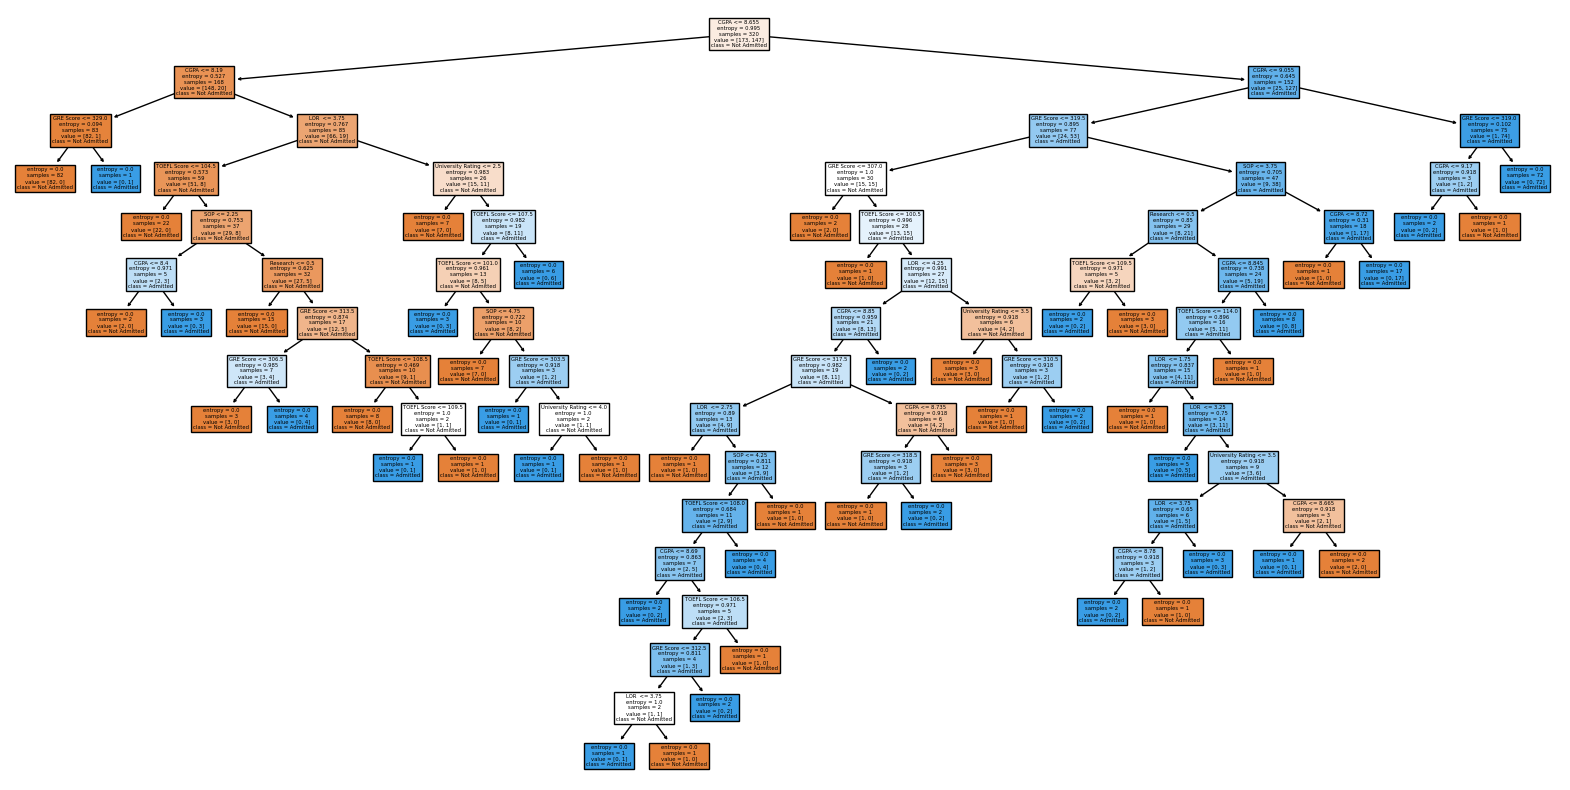

In [ ]:

plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns.tolist(),  # <-- Convert Index to list
    class_names=['Not Admitted', 'Admitted'],
    filled=True
)
plt.show()
